In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
fi = pd.read_csv('/content/drive/MyDrive/Manthani.csv')
print(fi.shape)
fi


(10, 10)


,S.No.,DO (mg/L),pH,BOD (mg/L),Turbidity (NTU),COD (mg/L),TDS (mg/L),EC,TSS (mg/L),Year
0,1,5.50,8.21,4.40,18.0,22,362.0,597,6.0,2014
1,2,5.90,7.66,2.20,11.0,20,207.0,595,14.0,2015
2,3,5.20,8.13,27.00,30.0,27,311.0,497,17.0,2016
3,4,4.60,8.21,3.00,16.0,34,469.0,712,14.0,2017
4,5,5.40,8.04,3.00,6.0,23,499.0,821,10.0,2018
5,6,4.50,7.90,4.30,6.0,26,443.0,720,8.0,2019
6,7,5.20,7.99,2.80,8.0,23,337.0,558,11.0,2020
7,8,5.50,7.84,2.20,6.0,17,331.0,551,8.0,2021
8,9,5.80,7.98,1.40,6.0,16,355.0,578,11.0,2022
9,10,5.88,7.73,1.63,5.5,20,337.6,560,11.3,2023


In [ ]:
cols = list(fi)[1:8]
print(cols)

['DO (mg/L)', 'pH', 'BOD (mg/L)', 'Turbidity (NTU)', 'COD (mg/L)', 'TDS (mg/L)', 'EC']


<Axes: >

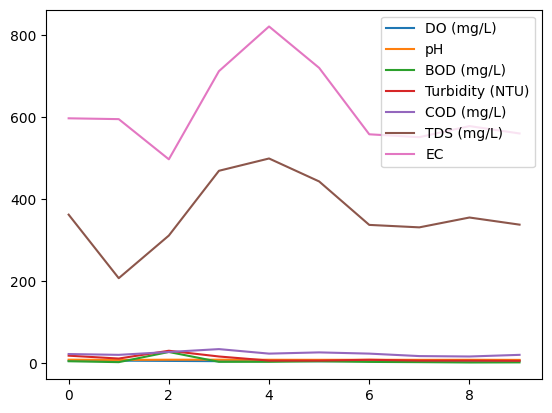

In [ ]:
df_for_training = fi[cols].astype(float)
df_for_training.plot()

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training

,DO (mg/L),pH,BOD (mg/L),Turbidity (NTU),COD (mg/L),TDS (mg/L),EC
0,5.50,8.21,4.40,18.0,22.0,362.0,597.0
1,5.90,7.66,2.20,11.0,20.0,207.0,595.0
2,5.20,8.13,27.00,30.0,27.0,311.0,497.0
3,4.60,8.21,3.00,16.0,34.0,469.0,712.0
4,5.40,8.04,3.00,6.0,23.0,499.0,821.0
5,4.50,7.90,4.30,6.0,26.0,443.0,720.0
6,5.20,7.99,2.80,8.0,23.0,337.0,558.0
7,5.50,7.84,2.20,6.0,17.0,331.0,551.0
8,5.80,7.98,1.40,6.0,16.0,355.0,578.0
9,5.88,7.73,1.63,5.5,20.0,337.6,560.0


In [ ]:
n_future = 1
n_past = 3

In [ ]:
trainX = []
trainYP = []
trainYN = []
trainYS = []
trainYA = []
trainYB = []
trainYC = []
trainYD = []

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
  trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
  trainYP.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
  trainYN.append(df_for_training_scaled[i + n_future - 1:i + n_future, 1])
  trainYS.append(df_for_training_scaled[i + n_future - 1:i + n_future, 2])
  trainYA.append(df_for_training_scaled[i + n_future - 1:i + n_future, 3])
  trainYB.append(df_for_training_scaled[i + n_future - 1:i + n_future, 4])
  trainYC.append(df_for_training_scaled[i + n_future - 1:i + n_future, 5])
  trainYD.append(df_for_training_scaled[i + n_future - 1:i + n_future, 6])


In [ ]:
print( trainX)
print(trainYP)

[array([[ 0.32679785,  1.34368745, -0.10818298,  0.89122988, -0.16012815,
        -0.03903451, -0.23200285],
       [ 1.18679219, -1.72281918, -0.40831231, -0.03300851, -0.56044854,
        -1.95370206, -0.25319033],
       [-0.31819791,  0.89765012,  2.97496376,  2.47563855,  0.84067281,
        -0.6690219 , -1.2913766 ]]), array([[ 1.18679219, -1.72281918, -0.40831231, -0.03300851, -0.56044854,
        -1.95370206, -0.25319033],
       [-0.31819791,  0.89765012,  2.97496376,  2.47563855,  0.84067281,
        -0.6690219 , -1.2913766 ],
       [-1.60818942,  1.34368745, -0.29917437,  0.62716177,  2.24179415,
         1.28270373,  0.98627696]]), array([[-0.31819791,  0.89765012,  2.97496376,  2.47563855,  0.84067281,
        -0.6690219 , -1.2913766 ],
       [-1.60818942,  1.34368745, -0.29917437,  0.62716177,  2.24179415,
         1.28270373,  0.98627696],
       [ 0.11179926,  0.39585813, -0.29917437, -0.69317879,  0.04003204,
         1.65328455,  2.14099434]]), array([[-1.60818942, 

In [ ]:
trainX, trainYP, trainYN, trainYS,trainYA,trainYB,trainYC,trainYD= np.array(trainX), np.array(trainYP), np.array(trainYN), np.array(trainYS),np.array(trainYA),np.array(trainYB),np.array(trainYC),np.array(trainYD)
print('trainX shape == {}.'.format(trainX.shape))
print('trainYP shape == {}.'.format(trainYP.shape))
print('trainYN shape == {}.'.format(trainYN.shape))
print('trainYS shape == {}.'.format(trainYS.shape))
print('trainYA shape == {}.'.format(trainYA.shape))
print('trainYB shape == {}.'.format(trainYB.shape))
print('trainYC shape == {}.'.format(trainYC.shape))
print('trainYD shape == {}.'.format(trainYD.shape))

trainX shape == (7, 3, 7).
trainYP shape == (7, 1).
trainYN shape == (7, 1).
trainYS shape == (7, 1).
trainYA shape == (7, 1).
trainYB shape == (7, 1).
trainYC shape == (7, 1).
trainYD shape == (7, 1).


In [ ]:
list1=[]

In [ ]:
modelP = Sequential()
modelP.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelP.add(LSTM(32, activation='relu', return_sequences=False))
modelP.add(Dropout(0.2))
modelP.add(Dense(trainYP.shape[1]))

In [ ]:
modelP.compile(optimizer='adam', loss='mse')
modelP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             18432     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

history = modelP.fit(trainX, trainYP, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 5s 701ms/step - loss: 1.1823 - val_loss: 1.2923
Epoch 2/50
2/2 [==============================] - 0s 54ms/step - loss: 1.1332 - val_loss: 1.3022
Epoch 3/50
2/2 [==============================] - 0s 51ms/step - loss: 1.1216 - val_loss: 1.3123
Epoch 4/50
2/2 [==============================] - 0s 53ms/step - loss: 1.0815 - val_loss: 1.3176
Epoch 5/50
2/2 [==============================] - 0s 49ms/step - loss: 1.0599 - val_loss: 1.3258
Epoch 6/50
2/2 [==============================] - 0s 55ms/step - loss: 1.0293 - val_loss: 1.3324
Epoch 7/50
2/2 [==============================] - 0s 58ms/step - loss: 1.0266 - val_loss: 1.3379
Epoch 8/50
2/2 [==============================] - 0s 71ms/step - loss: 1.0097 - val_loss: 1.3412
Epoch 9/50
2/2 [==============================] - 0s 72ms/step - loss: 0.9984 - val_loss: 1.3459
Epoch 10/50
2/2 [==============================] - 0s 49ms/step - loss: 0.9631 - val_loss: 1.3510
Epoch 11/50
2/2 [===========

In [ ]:
historyP = history

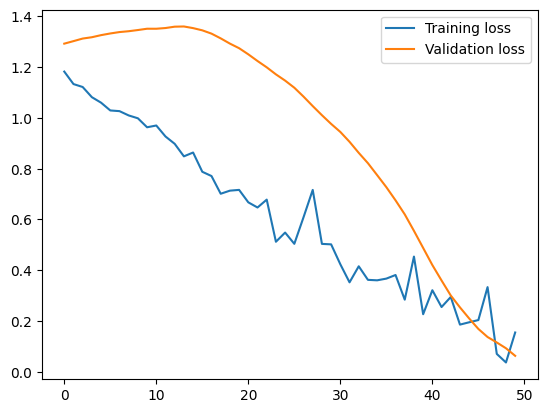

In [ ]:
plt.plot(historyP.history['loss'], label='Training loss')
plt.plot(historyP.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionP = modelP.predict(trainX)

1/1 [==============================] - 0s 375ms/step


In [ ]:
prediction_copiesP = np.repeat(predictionP, df_for_training.shape[1], axis=-1)
y_pred_futureP = scaler.inverse_transform(prediction_copiesP)[:,0]

In [ ]:
print(y_pred_futureP)

[4.7352967 5.139647  4.3284817 5.188315  5.529246  5.771194  5.7630043]


In [ ]:
print(y_pred_futureP[-1])
i=y_pred_futureP[-1]
do=((i)*100/9)*0.3723
do

5.7630043


23.839627799987795

In [ ]:
modelN = Sequential()
modelN.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelN.add(LSTM(32, activation='relu', return_sequences=False))
modelN.add(Dropout(0.2))
modelN.add(Dense(trainYN.shape[1]))

In [ ]:
modelN.compile(optimizer='adam', loss='mse')
modelN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyN = modelN.fit(trainX, trainYN, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 3s 416ms/step - loss: 0.4284 - val_loss: 1.7860
Epoch 2/50
2/2 [==============================] - 0s 48ms/step - loss: 0.4295 - val_loss: 1.8025
Epoch 3/50
2/2 [==============================] - 0s 36ms/step - loss: 0.4250 - val_loss: 1.8175
Epoch 4/50
2/2 [==============================] - 0s 36ms/step - loss: 0.4118 - val_loss: 1.8268
Epoch 5/50
2/2 [==============================] - 0s 41ms/step - loss: 0.4218 - val_loss: 1.8333
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.3906 - val_loss: 1.8402
Epoch 7/50
2/2 [==============================] - 0s 40ms/step - loss: 0.3866 - val_loss: 1.8499
Epoch 8/50
2/2 [==============================] - 0s 37ms/step - loss: 0.3711 - val_loss: 1.8587
Epoch 9/50
2/2 [==============================] - 0s 35ms/step - loss: 0.3624 - val_loss: 1.8707
Epoch 10/50
2/2 [==============================] - 0s 41ms/step - loss: 0.3549 - val_loss: 1.8858
Epoch 11/50
2/2 [===========

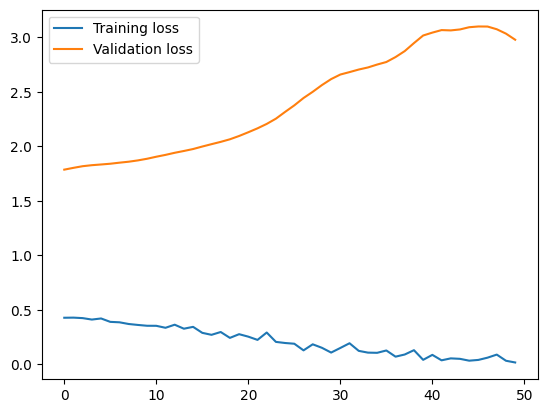

In [ ]:
plt.plot(historyN.history['loss'], label='Training loss')
plt.plot(historyN.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionN = modelN.predict(trainX)

1/1 [==============================] - 0s 338ms/step


In [ ]:
prediction_copiesN = np.repeat(predictionN, df_for_training.shape[1], axis=-1)
y_pred_futureN = scaler.inverse_transform(prediction_copiesN)[:,1]

In [ ]:
print(y_pred_futureN)

[8.205994  8.045659  7.9122043 7.963305  7.8927603 7.973825  8.039455 ]


In [ ]:
print(y_pred_futureN[-1])
i=y_pred_futureN[-1]
ph=((i-7)*100/1.5)*0.1176

8.039455


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYS.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 4s 579ms/step - loss: 0.1116 - val_loss: 0.2307
Epoch 2/50
2/2 [==============================] - 0s 38ms/step - loss: 0.0948 - val_loss: 0.2191
Epoch 3/50
2/2 [==============================] - 0s 47ms/step - loss: 0.0823 - val_loss: 0.2080
Epoch 4/50
2/2 [==============================] - 0s 55ms/step - loss: 0.0694 - val_loss: 0.1967
Epoch 5/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0580 - val_loss: 0.1862
Epoch 6/50
2/2 [==============================] - 0s 37ms/step - loss: 0.0478 - val_loss: 0.1754
Epoch 7/50
2/2 [==============================] - 0s 37ms/step - loss: 0.0442 - val_loss: 0.1641
Epoch 8/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0430 - val_loss: 0.1521
Epoch 9/50
2/2 [==============================] - 0s 44ms/step - loss: 0.0466 - val_loss: 0.1403
Epoch 10/50
2/2 [==============================] - 0s 37ms/step - loss: 0.0319 - val_loss: 0.1292
Epoch 11/50
2/2 [===========

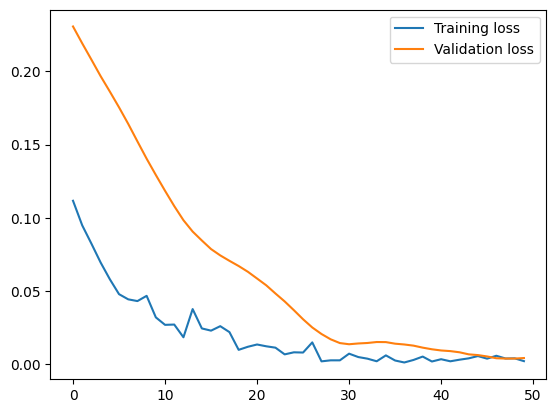

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX)

1/1 [==============================] - 0s 317ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
print(y_pred_futureS)

[2.8829234 2.8605819 4.0927486 2.6610322 1.7954215 1.2850965 2.1004164]


In [ ]:
i=y_pred_futureS[-1]
bod=(i*100/25)*0.3723
print(i)

2.1004164


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYA.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 3s 425ms/step - loss: 0.1329 - val_loss: 0.2134
Epoch 2/50
2/2 [==============================] - 0s 40ms/step - loss: 0.1142 - val_loss: 0.2037
Epoch 3/50
2/2 [==============================] - 0s 41ms/step - loss: 0.0971 - val_loss: 0.1941
Epoch 4/50
2/2 [==============================] - 0s 38ms/step - loss: 0.0809 - val_loss: 0.1848
Epoch 5/50
2/2 [==============================] - 0s 40ms/step - loss: 0.0742 - val_loss: 0.1751
Epoch 6/50
2/2 [==============================] - 0s 44ms/step - loss: 0.0626 - val_loss: 0.1652
Epoch 7/50
2/2 [==============================] - 0s 50ms/step - loss: 0.0554 - val_loss: 0.1552
Epoch 8/50
2/2 [==============================] - 0s 39ms/step - loss: 0.0411 - val_loss: 0.1448
Epoch 9/50
2/2 [==============================] - 0s 41ms/step - loss: 0.0371 - val_loss: 0.1346
Epoch 10/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0286 - val_loss: 0.1248
Epoch 11/50
2/2 [===========

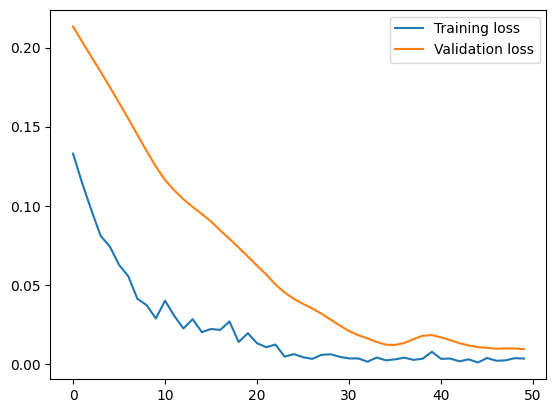

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX)

1/1 [==============================] - 0s 368ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
print(y_pred_futureS)

[2.9348054 2.9568846 4.1034756 3.0030894 2.156693  1.524002  2.3364842]


In [ ]:
i=y_pred_futureS[-1]
tur=(i*100/5)*0.1
print(tur)

4.67296838760376


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYB.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 3s 452ms/step - loss: 0.1309 - val_loss: 0.2216
Epoch 2/50
2/2 [==============================] - 0s 48ms/step - loss: 0.1169 - val_loss: 0.2101
Epoch 3/50
2/2 [==============================] - 0s 40ms/step - loss: 0.1091 - val_loss: 0.1991
Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0963 - val_loss: 0.1883
Epoch 5/50
2/2 [==============================] - 0s 39ms/step - loss: 0.0869 - val_loss: 0.1778
Epoch 6/50
2/2 [==============================] - 0s 44ms/step - loss: 0.0852 - val_loss: 0.1669
Epoch 7/50
2/2 [==============================] - 0s 40ms/step - loss: 0.0656 - val_loss: 0.1556
Epoch 8/50
2/2 [==============================] - 0s 38ms/step - loss: 0.0537 - val_loss: 0.1442
Epoch 9/50
2/2 [==============================] - 0s 60ms/step - loss: 0.0557 - val_loss: 0.1321
Epoch 10/50
2/2 [==============================] - 0s 43ms/step - loss: 0.0415 - val_loss: 0.1201
Epoch 11/50
2/2 [===========

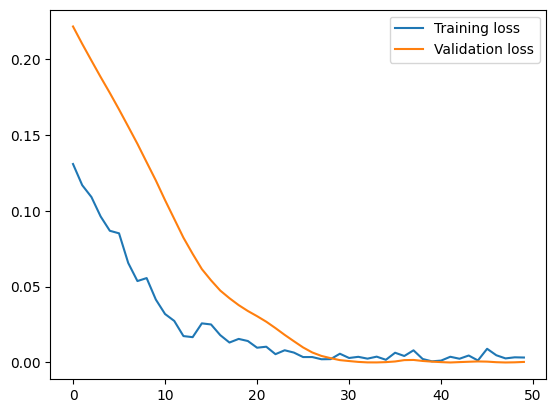

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX)

1/1 [==============================] - 0s 486ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
print(y_pred_futureS)
i=y_pred_futureS[-1]
cod=(i*100/10)*0.12
print(cod)

[2.8900282 2.970815  4.1789107 3.0190597 2.1305585 1.4670299 1.4908906]
1.7890687465667725


In [ ]:
l=[do,ph,bod,tur,cod]
print(l)
print(sum(l))

[23.839627799987795, 8.149330444335938, 3.1279401354789735, 4.67296838760376, 1.7890687465667725]
41.578935513973235


In [ ]:
modelP = Sequential()
modelP.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelP.add(LSTM(32, activation='relu', return_sequences=False))
modelP.add(Dropout(0.2))
modelP.add(Dense(trainYC.shape[1]))

In [ ]:
modelP.compile(optimizer='adam', loss='mse')
modelP.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 3, 64)             18432     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = modelP.fit(trainX, trainYP, epochs=50, batch_size=4, validation_split=0.1, verbose=1)

Epoch 1/50
2/2 [==============================] - 5s 664ms/step - loss: 1.1875 - val_loss: 1.3049
Epoch 2/50
2/2 [==============================] - 0s 57ms/step - loss: 1.1571 - val_loss: 1.3065
Epoch 3/50
2/2 [==============================] - 0s 52ms/step - loss: 1.1624 - val_loss: 1.3110
Epoch 4/50
2/2 [==============================] - 0s 69ms/step - loss: 1.1344 - val_loss: 1.3132
Epoch 5/50
2/2 [==============================] - 0s 72ms/step - loss: 1.1241 - val_loss: 1.3126
Epoch 6/50
2/2 [==============================] - 0s 66ms/step - loss: 1.1143 - val_loss: 1.3113
Epoch 7/50
2/2 [==============================] - 0s 71ms/step - loss: 1.1081 - val_loss: 1.3112
Epoch 8/50
2/2 [==============================] - 0s 58ms/step - loss: 1.0664 - val_loss: 1.3115
Epoch 9/50
2/2 [==============================] - 0s 67ms/step - loss: 1.0568 - val_loss: 1.3122
Epoch 10/50
2/2 [==============================] - 0s 54ms/step - loss: 1.0271 - val_loss: 1.3107
Epoch 11/50
2/2 [===========

In [ ]:
historyP = history

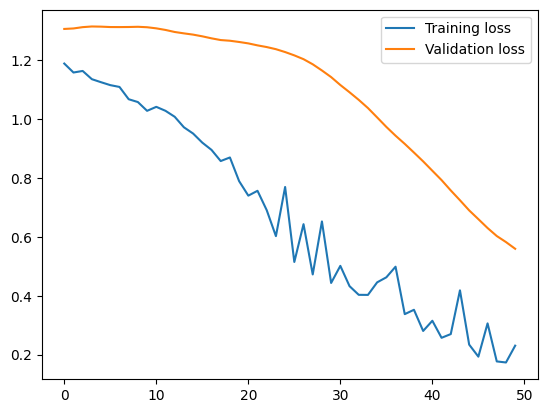

In [ ]:
plt.plot(historyP.history['loss'], label='Training loss')
plt.plot(historyP.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionP = modelP.predict(trainX)

1/1 [==============================] - 0s 349ms/step


In [ ]:
prediction_copiesP = np.repeat(predictionP, df_for_training.shape[1], axis=-1)
y_pred_futureP = scaler.inverse_transform(prediction_copiesP)[:,0]

In [ ]:
print(y_pred_futureP)
ec=y_pred_futureP[-1]
print(ec)

[4.8937745 5.058568  4.6499786 5.1647825 5.5333853 5.713256  5.532223 ]
5.532223


In [ ]:
l=[do,ph,bod,tur,cod,ec]
print(l)
WQI=sum(l)
print(WQI)

[23.839627799987795, 8.149330444335938, 3.1279401354789735, 4.67296838760376, 1.7890687465667725, 5.532223]
47.11115873861313


In [ ]:
def get_WQI_bucket(x):
    if x>=0 and x <= 25:
        return "Excellent"
    elif x>=26 and x<=50:
        return "Good"
    elif x >=51 and x<=75:
        return "Poor"
    elif x>=76 and x<100:
        return "Very Poor"
    else:
        return "Not Suitable for drinking"
result=get_WQI_bucket(WQI)
print(result)

Good
